### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

* Independent variable: whether the word and color are congruent or incongruent.
* Dependent variable: the time period between seeing the word and stating the font color (for both congruent and incongruent).

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

We have two groups congruent(number 1) and incongruent(number 2), the hypotheses are built around the average time for these groups.<br>
<br>
Here are our hypotheses:
$$H_0: μ_{1} <= μ_{2}$$
$$H_1: μ_{1} > μ_{2}$$

**The null hypotheses ($H_0$)**:<br>
The average population time($μ_{1}$) it takes to state the font color for congruent word is less than or equal the average time($μ_{2}$) for incongruent words.
<br>
**The alternative hypotheses ($H_1$)**:<br>
The average population time($μ_{1}$) it takes to state the font color for congruent word is greater than the average time($μ_{2}$) for incongruent words.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In this section descriptive statistics will be performed for measure of center and measure of spread(variability).

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np 

# load and explore the csv file
df = pd.read_csv('stroopdata.csv')
#df.info() # df.head()
#df.shape[0], df.shape[1]
#df.nunique()

The dataframe is small (only 24 rows and two columns), and has no null value.

In [2]:
# Now its time for statistics!
# Measure of center:
# Mean:
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [3]:
#Median:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

The average(mean) time and the median for congruent group are less than the incongruent group.

In [4]:
#Measure of spread:
#Standard deviation:
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [5]:
#Range:
df.max() - df.min()

Congruent      13.698
Incongruent    19.568
dtype: float64

The standard deviation and range for congruent group are less than the incongruent group.<br>
These results proves that we can't reject the null hypothese at this stage and we need to investigate more.<br>
**Note:** describe method can be used to generate all the above results, but I prefer breaking it down.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

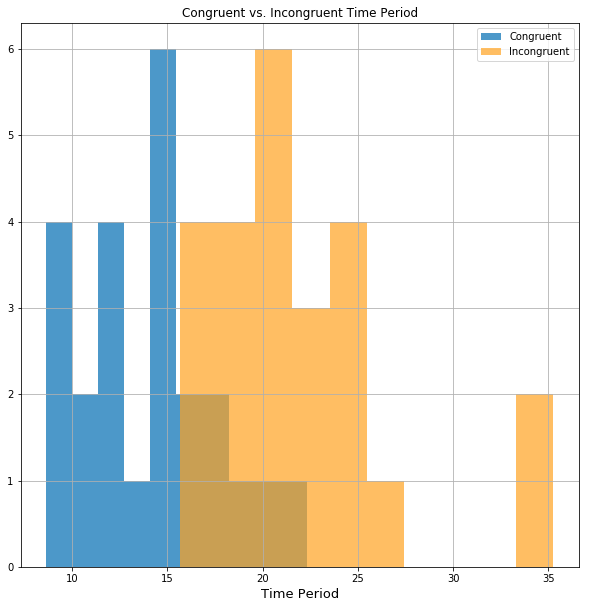

In [6]:
# import matpoltlib for visualizations
import matplotlib.pyplot as plt
#The magic line
% matplotlib inline 

# hist digram to visualize the time period for each group:
df.Congruent.hist(alpha = 0.7, label = 'Congruent', 
                    figsize = (10, 10), color = '#006CB2')
df.Incongruent.hist(alpha = 0.7, label = 'Incongruent', 
                      figsize = (10, 10), color = '#FFA321')
plt.title('Congruent vs. Incongruent Time Period')
plt.legend()
plt.xlabel('Time Period', fontsize = 13)
plt.show()

The hist shows the same result as the previous results:
* There are two outliers in incongruent group with 34 and 35.
* The congruent range is smaller than incongruent group.

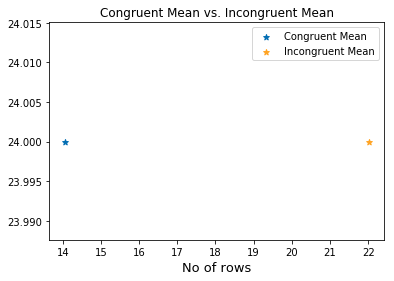

In [7]:
# scatter plots to visualize the mean for each group:
plt.scatter(x = df['Congruent'].mean(), y = df['Congruent'].count(), marker = '*',
            color='#006CB2', label = 'Congruent Mean')
plt.scatter(x = df['Incongruent'].mean(), y = df['Incongruent'].count(), marker = '*',
            color='#FFA321', label = 'Incongruent Mean')
plt.title('Congruent Mean vs. Incongruent Mean')
plt.legend()
plt.xlabel('Mean', fontsize = 13)
plt.xlabel('No of rows', fontsize = 13)
plt.show()

The scatter plots shows the same result:
* congruent mean = 14.
* incngruent mean = 22.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Our hypotheses:
$$H_0: μ_{1} - μ_{2} <= 0$$
$$H_1: μ_{1} - μ_{2} > 0$$

In [8]:
# Simulate a sample
boot_means = []
for _ in range(10000):
    bootsamp = df.sample(200, replace = True)
    boot_means.append(bootsamp['Congruent'].mean() - bootsamp['Incongruent'].mean())
actual_diff = df['Congruent'].mean() - df['Incongruent'].mean()
boot_means = np.array(boot_means)
null_vals = np.random.normal(0, boot_means.std(), boot_means.size)

In [9]:
# Confidence interval for 95%
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(-8.6356863749999953, -7.3205764999999978)

In [10]:
actual_diff = df['Congruent'].mean() - df['Incongruent'].mean()
boot_means = np.array(boot_means)
null_vals = np.random.normal(0, boot_means.std(), boot_means.size)

(boot_means > actual_diff).mean()

0.49990000000000001

The p-value is large (larger than type I error $\alpha$ which equals 0.05), thus we can't reject the null hypotheses($H_0$).<br>
The average time for group one is less than or equal the second group. Also, the result in part 2 specifies that the average time for group one is less than group two.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255